In [1]:
using PyPlot;

INFO: Loading help data...


In [97]:
coinFlip(w)= (rand()< w)? 1: 0;
function CoinAssignment2(w,num)
    H= [0:0.001:1];
    
    events= zeros(Int,1,num);
    for i=1:num
        events[i]= coinFlip(w);
    end
        
    perior_prob= zeros(3,length(H));
    posterior_prob= zeros(3,length(H));
    norm= zeros(3,2);
    posterior_probNorm= zeros(3,length(H));
    
    #--------------------------------------
    b=1; a=0; #parameters for Uniform distribution
    
    segma= 0.5; meue= 0.5;#parameters for Normal distribution
    
    alfa= 0.5; beta=0.5;#parameters for Beta distribution
    
    N= num; R= sum(events);#parameters for Binomial distribution
    #--------------------------------------------------
    likelihood= H.^R .* (1-H).^(N-R); #likelihood function follows Binomial Distribution
    
    perior_prob[1,:]= (1/(b-a))*ones(Int,1,length(H)); #perior function follows Uniform distribution
    for i=1:length(H)
        perior_prob[2,i]= (exp(-(H[i]-meue)^2 / (2*segma^2))/(segma*(2* pi)^(1/2)));
        perior_prob[3,i]= (H[i])^(alfa-1)*(1-H[i])^(beta-1);
    end
    #--------------------------------------------------
    posterior_prob= likelihood' .* perior_prob;
    norm= [minimum(posterior_prob) maximum(posterior_prob)];
    
    if (norm[3,2] == Inf)
        k= find(posterior_prob[3,:] == Inf);
        posterior_prob[3,k] = 1;
        norm[3,2]= 1;
        sec_max= maximum(posterior_prob[3,:])
        posterior_prob[3,k] = sec_max + 1;
        norm[3,2]= sec_max+ 1;
    end
    
    for j=1:3
        posterior_probNorm[j,:] = (posterior_prob[j,:] - norm[j,1])./(norm[j,2] - norm[j,1]);
    end 

    
    #posterior_prob= perior_prob; #just for test in the first case (no data)
    
    plot(H,posterior_probNorm');
    #plot(H,posterior_prob');
    ylabel("Posterior Prob")
    xlabel("H wight")
    #return H, posterior_probNorm;
end

CoinAssignment2 (generic function with 1 method)

In [99]:
minimum([1,3,5;9,8,5],1)

LoadError: syntax: unexpected semicolon in array expression
while loading In[99], in expression starting on line 1

In [98]:
CoinAssignment2(0.25,1)

LoadError: BoundsError()
while loading In[98], in expression starting on line 1

In [28]:
w= 0.25; number=1;
H= [0:0.001:1]
events= zeros(Int,1,number);
    for i=1:number
        events[i]= coinFlip(w);
    end
        
    perior_prob= zeros(3,length(H));
    posterior_prob= zeros(3,length(H));
    norm= zeros(3,2);

In [29]:
#--------------------------------------
    b=1; a=0; #parameters for Uniform distribution
    
    segma= 0.5; meue= 0.5;#parameters for Normal distribution
    
    alfa= 0.5; beta=0.5;#parameters for Beta distribution
    
N= number; R= sum(events);#parameters for Binomial distribution
    #--------------------------------------------------

0

In [30]:
likelihood= H.^R .* (1-H).^(N-R); #likelihood function follows Binomial Distribution
    
    perior_prob[1,:]= (1/(b-a)).*ones(1,length(H)); #perior function follows Uniform distribution
    for i=1:length(H)
        perior_prob[2,i]= (exp(-(H[i]-meue)^2 / (2*segma^2))/(segma*(2* pi)^(1/2)));
        perior_prob[3,i]= (H[i])^(alfa-1)*(1-H[i])^(beta-1);
    end

In [34]:
for j=1:3
        posterior_prob[j,:]= likelihood .* perior_prob[j,:];
        norm(j,:)= [minimum(posterior_prob[j,:]) maximum(posterior_prob[j,:])];
        
        if (norm[j,2] == Inf)
            k= find(posterior_prob[j,:] .== Inf)
            posterior_prob[j,k] = 1;
            norm[j,2]= 1;
        sec_max= maximum(posterior_prob[j,:])
            posterior_prob[j,k] = sec_max + 1;
            norm[j,2]= sec_max+ 1;
        #end
        #posterior_probNorm[j,:] = (posterior_prob[j,:] - norm[j,1])./(norm[j,2] - norm[j,1]);
    end

LoadError: DimensionMismatch("tried to assign 1001x1001 array to 1x1001 destination")
while loading In[34], in expression starting on line 1

In [ ]:
CoinAssignment2(0.25,2)

In [ ]:
CoinAssignment2(0.25,4)

1001
1001
1001
(3,1001)
(1001,)


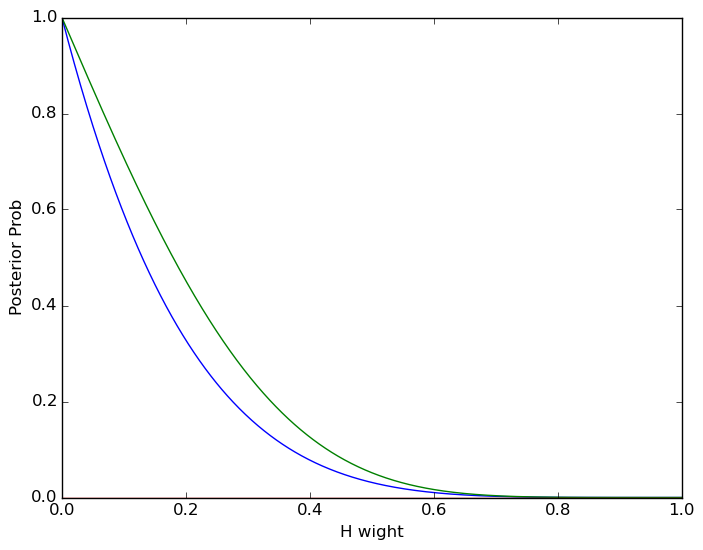

PyObject <matplotlib.text.Text object at 0x7f392ae32b50>

In [74]:
CoinAssignment2(0.25,5)

1001
1001
1001
(3,1001)
(1001,)


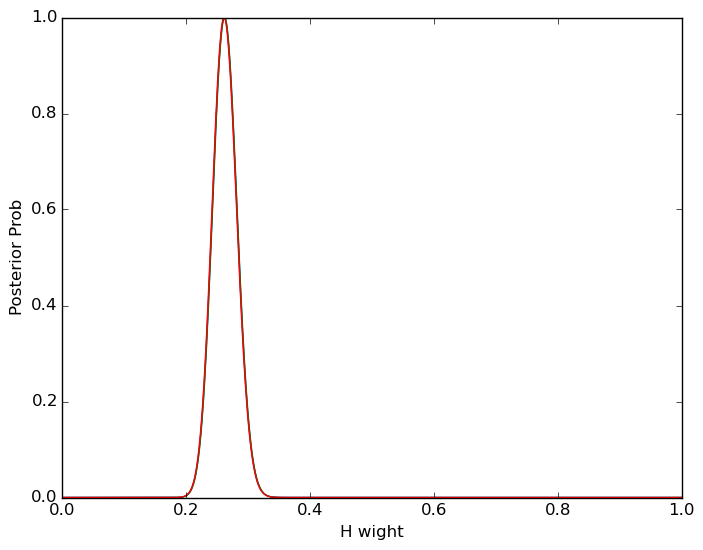

PyObject <matplotlib.text.Text object at 0x7f392af4ce50>

In [75]:
CoinAssignment2(0.25,500)